# Classifier methods, week 12 demo

## Libraries and settings

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay

In [84]:
import warnings
warnings.filterwarnings('ignore')

In [85]:
float_formatter = "{:.4f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

# Diabetes data

In [86]:
# National Institute of Diabetes and Digestive and Kidney Diseases 1988
# Source: J Smith et al, Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.
# All patients are females aged at least 21 years and of Pima Indian heritage (Arizona, USA).
# https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
dfo = pd.read_csv("diabetes.csv")
dfo.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


In [87]:
dfo.Outcome.value_counts()
# target is categorical so Classifier methods will be used
# 0 = NOT diabetic; 1 = diabetic
# target unbalanced but not extremely so

Outcome
0    500
1    268
Name: count, dtype: int64

In [88]:
dfo.dtypes.value_counts()
# features are all numeric so no need for label encoding 

int64      7
float64    2
Name: count, dtype: int64

In [89]:
dfo.isnull().values.any()
# no nulls so can be plotted simply

False

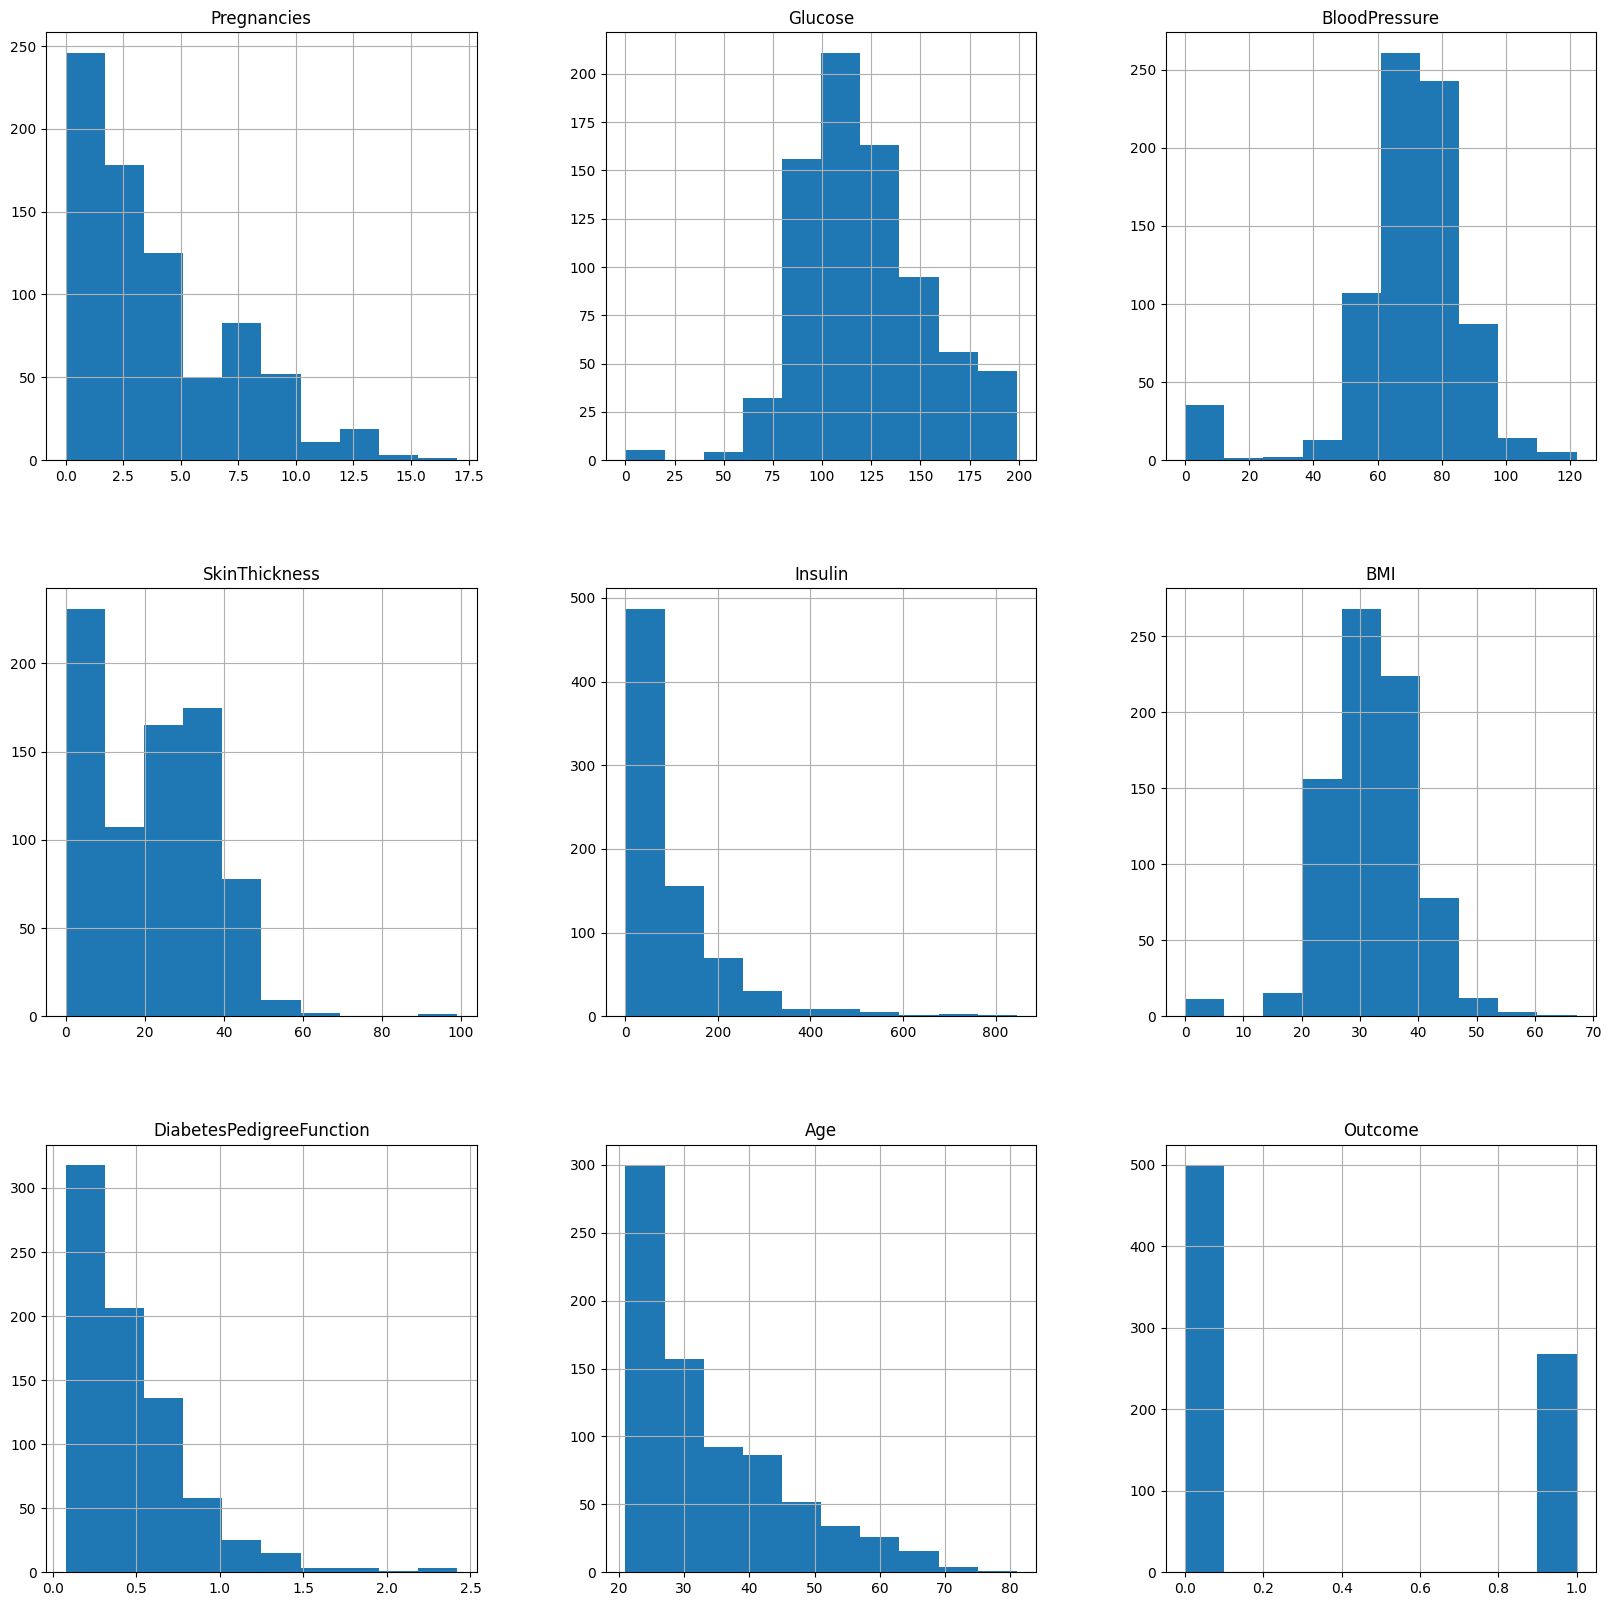

In [90]:
p = dfo.hist(figsize = (20,20))

In [91]:
(dfo == 0).sum()
# five features have nonsense zero values that should be nulls

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [92]:
# change those zeros to nulls
df = dfo.copy(deep=True)
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dfo[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [93]:
# change Nulls to mean of column
# alternative would be to split rows by outcome 0/1 and use two means 
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace = True)
df['Insulin'].fillna(df['Insulin'].mean(), inplace = True)
df['BMI'].fillna(df['BMI'].mean(), inplace = True)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [95]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


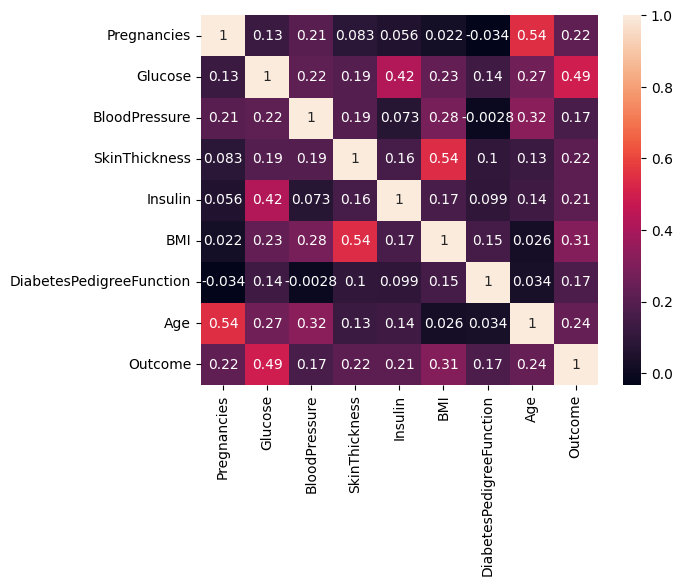

In [96]:
sns.heatmap(df.corr(), annot = True)
plt.show()
# Glucose and BMI have strong correlations with Outcome

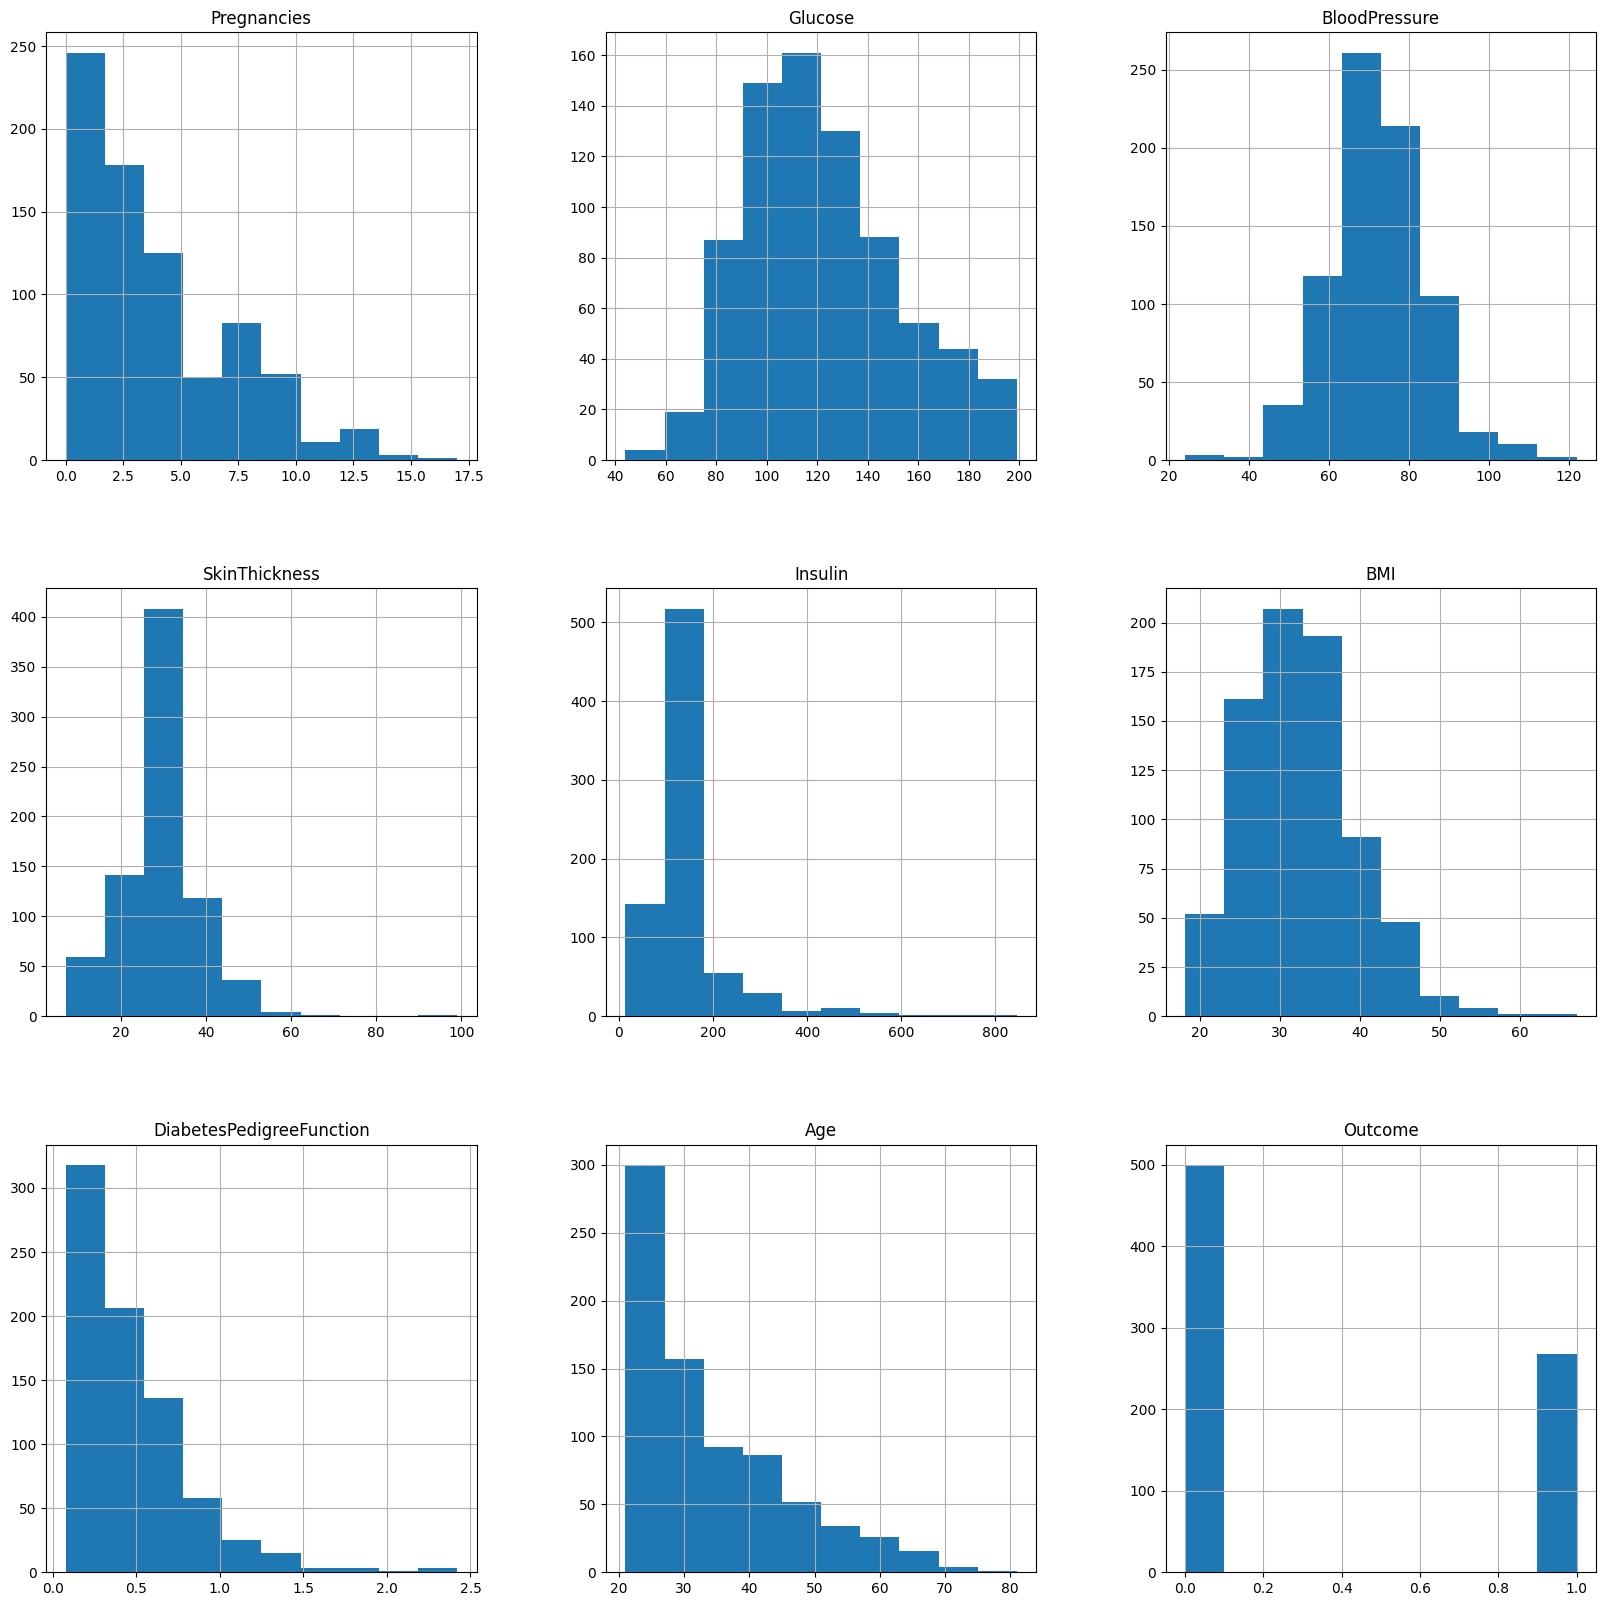

In [97]:
df.hist(figsize = (20,20))
plt.show()
# plot after zero/nulls changed to mean

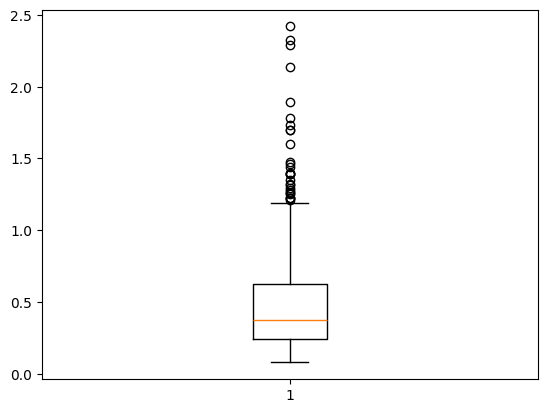

In [98]:
plt.boxplot(df.DiabetesPedigreeFunction)
plt.show() #no extreme outliers 

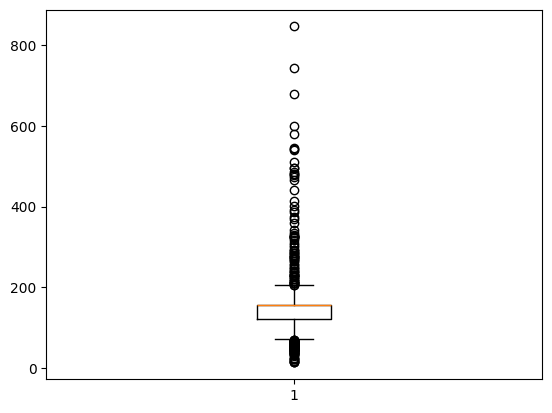

In [99]:
plt.boxplot(df.Insulin)
plt.show() # no extreme outliers

Outcome
0    500
1    268
Name: count, dtype: int64


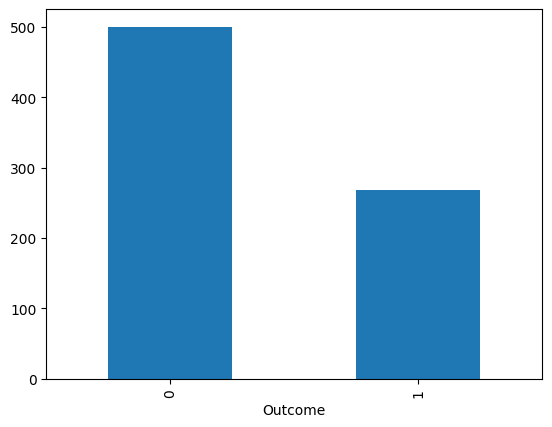

In [100]:
print(df.Outcome.value_counts())
figsize = (4,4)
df.Outcome.value_counts().plot(kind="bar")
plt.show()

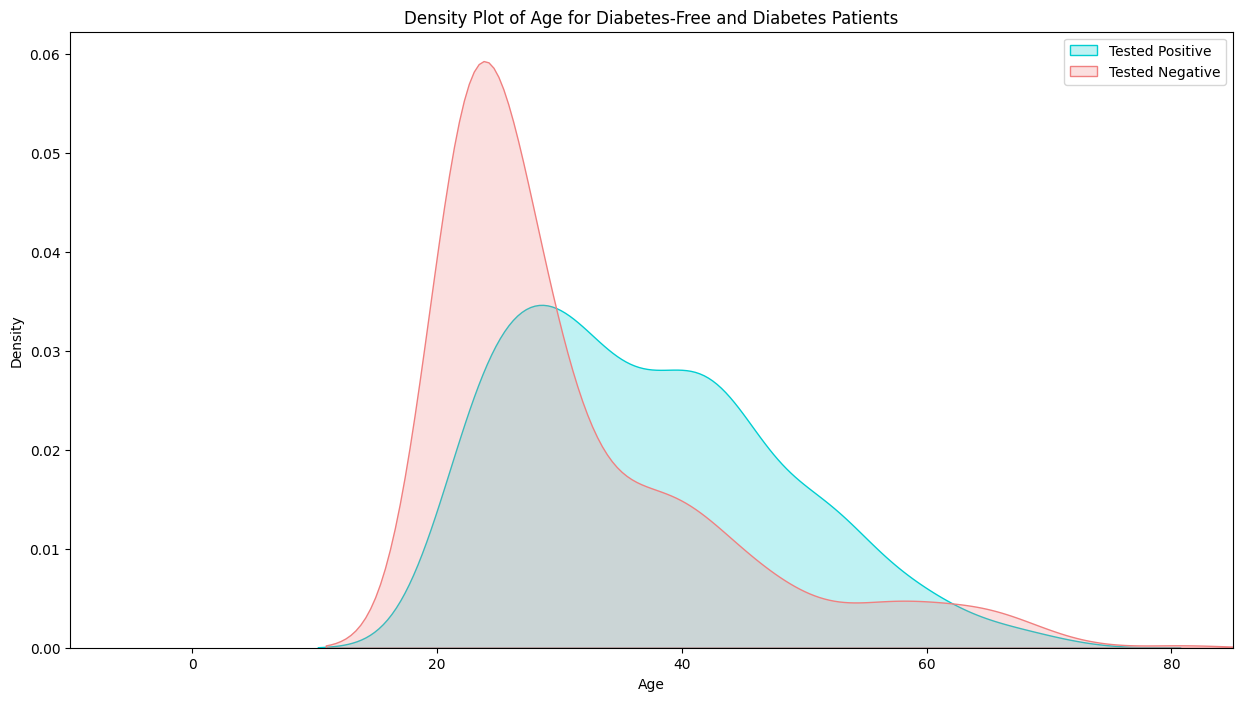

In [119]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df["Age"][df.Outcome == 1], color="darkturquoise", shade=True)
sns.kdeplot(df["Age"][df.Outcome == 0], color="lightcoral", shade=True)
plt.legend(['Tested Positive', 'Tested Negative'])
plt.title('Density Plot of Age for Diabetes-Free and Diabetes Patients')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

## Prepare train & test data

In [109]:
X = df.drop('Outcome', axis=1)
y = df.Outcome
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [110]:
df_diabetes_zeros_to_mean = df.copy(deep=True)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state = 42)
print(X_train.shape)

<class 'pandas.core.frame.DataFrame'>
(614, 8)


In [112]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
print(X_train_scaled[0])

[-0.8514 -1.0575 -0.8280 -1.9231 -1.4019 -0.7698 0.3108 -0.7922]


In [113]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(dataframe["Age"][dataframe.Outcome == 1], color="darkturquoise", shade=True)
sns.kdeplot(dataframe["Age"][dataframe.Outcome == 0], color="lightcoral", shade=True)
plt.legend(['Tested Positive', 'Tested Negative'])
plt.title('Density Plot of Age for Diabetes-Free and Diabetes Patients')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()X_test_scaled = scaler.transform(X_test)
print(X_test_scaled[0])

[0.9605 1.2442 -0.6649 0.0076 0.0439 -0.7405 -0.5558 0.5610]


## Logistic Regression

In [114]:
model = LogisticRegression(C=0.01, max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(C=0.01, max_iter=200)

In [115]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test_scaled)[:,1]

In [116]:
print("%.4f" % log_loss(y_test, y_pred))

10.5322


In [120]:
confusion_matrix(y_test, y_pred)

array([[80, 20],
       [25, 29]])

In [64]:
print("%.4f" % accuracy_score(y_test, y_pred))

0.7662


In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



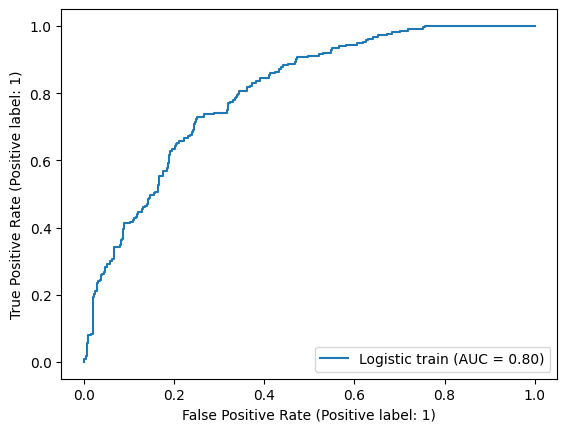

In [66]:
RocCurveDisplay.from_predictions(y_train, model.predict_proba(X_train_scaled)[:,1], name="Logistic train")  
plt.show()  

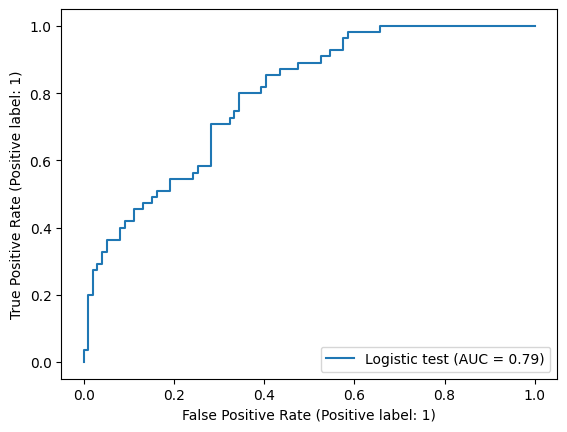

In [67]:
RocCurveDisplay.from_predictions(y_test, model.predict_proba(X_test_scaled)[:,1], name="Logistic test")  
plt.show()  

### Model 2 - L1, Saga, C=0.1 

In [68]:
model2 = LogisticRegression(C=0.1, penalty="l1", solver="saga", max_iter=2000)
model2.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=2000, penalty='l1', solver='saga')

In [69]:
y_pred = model2.predict(X_test_scaled)
y_prob = model2.predict_proba(X_test_scaled)[:,1]

In [71]:
print("%.4f" % log_loss(y_test, y_pred))

11.0003


In [72]:
confusion_matrix(y_test, y_pred)

array([[81, 18],
       [29, 26]])

In [73]:
print("%.4f" % accuracy_score(y_test, y_pred))

0.6948


In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78        99
           1       0.59      0.47      0.53        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.68      0.69      0.69       154



In [77]:
print("%.4f" % roc_auc_score(y_test, y_prob))
# worse than first model

0.6815


In [78]:
# practice saving a model
from joblib import dump, load
dump(model, "logistic_model_1.joblib")

['logistic_model_1.joblib']

In [ ]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=42)

os_data_X, os_data_y = os.fit_sample(X_train_scaled, y)
os_data_X = pd.DataFrame(data=os_data_X,columns=dataframe.columns[:8] )
os_data_y = pd.DataFrame(data=os_data_y.ravel(),columns=['Outcome'])

# Printing the outcomes
print("length of oversampled data is ",len(os_data_X))
print("Number of positively tested in oversampled data",len(os_data_y.values.ravel()[os_data_y['Outcome'].values.ravel()==0]))
print("Number of negatively tested",len(os_data_y.values.ravel()[os_data_y['Outcome'].values.ravel()==1]))
print("Proportion of positively tested in oversampled data is ",len(os_data_y.values.ravel()[os_data_y['Outcome'].values.ravel()==0])/len(os_data_X))
print("Proportion of negatively tested in oversampled data is ",len(os_data_y.values.ravel()[os_data_y['Outcome'].values.ravel()==1])/len(os_data_X))


# Cross-Validation

### K-fold

In [45]:
from sklearn.model_selection import KFold
k = 5
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression(solver='liblinear')

In [46]:
acc_score = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index, :],X.iloc[test_index, :]
    y_train, y_test = y[train_index] , y[test_index]

    # print(test_index)
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153]
[154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 

## Decision Tree Classifier

In [ ]:
# scaling not needed for decision tree

In [ ]:
# data refresh (df as feature names are needded)
# df = pd.read_csv("diabetes.csv")
X = df.drop('Outcome', axis=1)
y = df.Outcome
# X = df.drop('Outcome', axis=1).to_numpy()
# y = df.Outcome.to_numpy() #.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
y_test.value_counts()
# nearly twice as many 0 as 1 (diabetes outcome)

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

In [ ]:
y_prob_train = model.predict_proba(X_train)[:, 1]
print(np.unique(y_prob_train, return_counts=True))
roc_auc_train = roc_auc_score(y_train, y_prob_train)
print(roc_auc_train)

In [ ]:
y_prob = model.predict_proba(X_test)[:, 1]
print(np.unique(y_prob, return_counts=True))
roc_auc = roc_auc_score(y_test, y_prob)
print("%.4f" % roc_auc)
# Training model was over-fitted, test AUROC is much lower

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=df.columns,  
                   class_names=['0','1'],
                   filled=True)

In [ ]:
model.feature_names_in_

In [ ]:
model.feature_importances_

In [ ]:
importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=["Importance"])
importances.sort_values(by='Importance', ascending=False, inplace=True)
importances.plot(kind='bar', figsize=(8,6))

In [ ]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))

### Tree-branching constrain to 2 levels 

In [ ]:
model2 = DecisionTreeClassifier(max_depth=2, min_samples_leaf=2)
model2.fit(X_train, y_train)

In [ ]:
y_prob = model2.predict_proba(X_test)[:, 1]
print(np.unique(y_prob, return_counts=True))

In [ ]:
roc_auc = roc_auc_score(y_test, y_prob)
print(roc_auc)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(25,20))
_ = plot_tree(model2, 
                   feature_names=df.columns,  
                   class_names=['0','1'],
                   filled=True)

In [ ]:
print(model2.feature_names_in_)
model2.feature_importances_

In [ ]:
importances = pd.DataFrame(model2.feature_importances_, index=X.columns, columns=["Importance"])
importances.sort_values(by='Importance', ascending=False, inplace=True)
importances.plot(kind='bar', figsize=(8,6))

In [ ]:
y_pred = model2.predict(X_test)
print(confusion_matrix(y_test, y_pred))

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf=model2, legend=2)

## Random Forest - Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 40)
model.fit(X_train, y_train)

In [ ]:
y_prob = model.predict_proba(X_test)[:, 1]
print(np.unique(y_prob, return_counts=True))
roc_auc_score(y_test, y_prob)
# is better than one tree

In [ ]:
model.feature_importances_

## Support Vector Classifier

In [ ]:
# some SV* kernels (notably rbf) do require X scaling

In [ ]:
# refresh data, split, scale, if required
# df = df_diabetes_zeros_to_mean
# X = df.drop('Outcome', axis=1)
# y = df.Outcome
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [ ]:
model = SVC(kernel='rbf', probability=True)
model.fit(X_train_scaled, y_train)

In [ ]:
y_prob = model.predict_proba(X_test_scaled)[:, 1]
y_prob[:5]

In [ ]:
roc_auc_score(y_test, y_prob)

In [ ]:
# returns class labels, discrete category
y_pred = model.predict(X_test_scaled)
y_pred[:10]

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
y_decision = model.decision_function(X_test_scaled)
y_decision[:5]

In [ ]:
# what's the difference between X_test, y_test
# SVC.score (ratio of correctly predicted instances) 
# and metrics.accuracy_score (generic)
model.score(X_test, y_test)

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
model2 = SVC(kernel='rbf', probability=True, gamma=0.01)
model2.fit(X_train_scaled, y_train)
y_prob = model2.predict_proba(X_test_scaled)[:, 1]
roc_auc_score(y_test, y_prob)

In [ ]:
y_pred = model2.predict(X_test_scaled)
confusion_matrix(y_test,y_pred)
# small improvement with lower Gamma

In [ ]:
model3 = SVC(kernel='poly', degree=5, probability=True)
model3.fit(X_train_scaled, y_train)
y_prob = model3.predict_proba(X_test_scaled)[:, 1]
roc_auc_score(y_test, y_prob)
# worse AUROC with polynomial SVC

In [ ]:
y_pred = model3.predict(X_test_scaled)
confusion_matrix(y_test,y_pred)
# halves false Negatives but increases false Positives, with polynomial SVC

### to enable plot limit to 2 features 

In [ ]:
X2 = df[['Glucose','BMI']]
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
scaler.fit(X2_train)
X2_train_scaled = scaler.transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

In [ ]:
from mlxtend.plotting import plot_decision_regions

In [ ]:
from pandas.plotting import scatter_matrix
from sklearn.metrics import classification_report

In [ ]:
model = SVC(kernel='linear', probability=True)
model.fit(X2_train_scaled, y_train)

In [ ]:
plot_decision_regions(X2_train_scaled, y_train.astype(int).values, clf=model, legend=2)

In [ ]:
model = SVC(kernel='poly', degree=3, probability=True)
model.fit(X2_train_scaled, y_train)
plot_decision_regions(X2_train_scaled, y_train.astype(int).values, clf=model, legend=2)

In [ ]:
model = SVC(kernel='rbf', probability=True)
model.fit(X2_train_scaled, y_train)
plot_decision_regions(X2_train_scaled, y_train.astype(int).values, clf=model, legend=2)

In [ ]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
        y=X[y == cl, 1],
        alpha=0.8,
        c=colors[idx],
        marker=markers[idx],
        label=f'Class {cl}',
        edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
            c='none', edgecolor='black', alpha=1.0,
            linewidth=1, marker='o',
            s=100, label='Test set')

## K-means clustering

## PCA pricipal components analysis